# 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Visual Exploration
#### 4. Data prep for regression analysis
#### 5. Regression analysis

### 1. Importing libraries and data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\zhoux\Documents\CF-Data Analyst Program\DA-Immersion\Achievement 6\11-2023 Berlin Housing Price Analysis'

In [3]:
# Import dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cleaned.pkl'))

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 2110 to 4002
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   energy             4937 non-null   object 
 1   heating            4937 non-null   object 
 2   price              4937 non-null   float64
 3   area               4937 non-null   float64
 4   rooms              4937 non-null   float64
 5   fee                4937 non-null   float64
 6   zipcode            4937 non-null   float64
 7   construction_year  4937 non-null   float64
 8   level              4937 non-null   float64
 9   price_per_area     4937 non-null   float64
dtypes: float64(8), object(2)
memory usage: 424.3+ KB


### 2. Data cleaning

In my previous analysis, I came to the result that "if the price_per_area is cheap (within 1/3 of its range), then it's hardly influenced by rooms and area. If the price_per_area is moderate to expensive (within the rest of its range), then it more likely is influenced by rooms and area." Therefore, I want to further investigate the relationship between these variables. I will make a subset which only contains these three variables.

In [5]:
df_sub = df[['area', 'rooms', 'price_per_area']]
df_sub

,area,rooms,price_per_area
2110,546.00,9.0,29120.879121
3718,72.74,3.0,22683.530382
3959,191.40,3.0,21682.340648
4487,462.00,10.0,21428.571429
2232,326.90,9.0,21107.372285
...,...,...,...
4341,124.23,4.0,1440.875795
4342,124.23,4.0,1440.875795
3255,637.22,22.0,1349.612379
3067,678.23,22.0,1300.001474


In [6]:
df_sub.describe()

,area,rooms,price_per_area
count,4937.000000,4937.000000,4937.000000
mean,84.981057,2.797650,6354.012572
std,58.016705,1.530276,2472.453375
min,13.000000,1.000000,997.581620
25%,54.040000,2.000000,4538.333333
50%,72.740000,3.000000,5843.852267
75%,101.000000,3.000000,8055.555556
max,970.000000,26.000000,29120.879121


In [7]:
df_sub['rooms'].value_counts(dropna=False)

rooms
3.0     1706
2.0     1552
1.0      667
4.0      607
5.0      241
6.0       88
8.0       22
7.0       22
10.0       9
9.0        6
15.0       3
12.0       3
20.0       2
13.0       2
22.0       2
16.0       1
18.0       1
26.0       1
23.0       1
14.0       1
Name: count, dtype: int64

In [8]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 2110 to 4002
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            4937 non-null   float64
 1   rooms           4937 non-null   float64
 2   price_per_area  4937 non-null   float64
dtypes: float64(3)
memory usage: 154.3 KB


This subset is already cleaned.

### 3. Visual Exploration

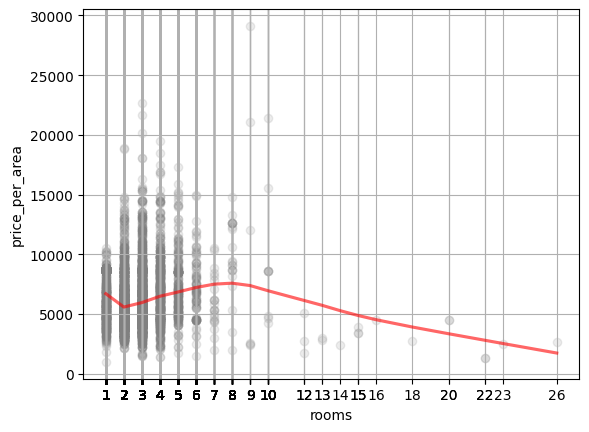

In [9]:
# Create a scatter plot for rooms and price_per_area
scatter_room = sns.regplot(data=df_sub, 
                           x='rooms', y='price_per_area',                            
                           lowess=True,
                           line_kws={'alpha':0.6,'color': 'red'},
                           scatter_kws={'alpha':0.15,'color': 'grey'}
                           )
scatter_room.set(xticks=df_sub.rooms.values)
scatter_room.grid()

This graph shows 3 different correlations between room number and the price-per-area:
1. a negative correlation when rooms>=1 and <2
2. a positive correlation when rooms>=2 and <8
3. a negative correlation when rooms>=8.

Because I am looking for a property suitable for one to two people, I will only focus on those with rooms<=4.

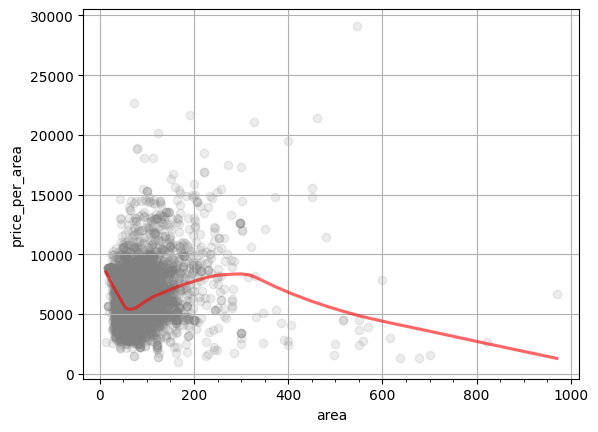

In [10]:
# Create a scatter plot for area and price_per_area
scatter_area = sns.regplot(data=df_sub,
                           x='area', y='price_per_area', 
                           lowess=True,
                           line_kws={'alpha':0.6,'color': 'red'},
                           scatter_kws={'alpha':0.15,'color': 'grey'}
                          )
scatter_area.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
scatter_area.grid()

This graph shows 3 different correlations between room number and the price-per-area:

1. a negative correlation when area>=0 and < around 70
2. a positive correlation when area>=70 and < around 250
3. a negative correlation when area>=250.

Because I am looking for a property suitable for one to two people, I will only focus on those with area < 100.

In [11]:
# Create a subset that only contains listings with room count <=4 and >=2
rooms_sliced = df_sub[(df_sub['rooms']<=4) & (df_sub['rooms']>=2)]
rooms_sliced

,area,rooms,price_per_area
3718,72.74,3.0,22683.530382
3959,191.40,3.0,21682.340648
781,123.90,3.0,20137.207425
4685,399.60,4.0,19509.509510
664,78.76,2.0,18886.808024
...,...,...,...
2087,701.71,3.0,1567.599151
452,72.74,3.0,1503.986802
451,72.74,3.0,1503.986802
4341,124.23,4.0,1440.875795


In [12]:
# Further filter the new subset to only contain listings with area <= 100 and >=45
area_sliced = rooms_sliced[(rooms_sliced['area']<= 100) & (rooms_sliced['area']>=45)]
area_sliced

,area,rooms,price_per_area
3718,72.74,3.0,22683.530382
664,78.76,2.0,18886.808024
726,79.00,2.0,18829.113924
3172,94.75,3.0,18068.601583
4884,91.40,3.0,15500.000000
...,...,...,...
1525,86.37,3.0,2234.572189
3397,68.70,2.0,2200.000000
356,55.70,3.0,2154.398564
452,72.74,3.0,1503.986802


In [13]:
# Further filter the new subset to only contain listings with price_per_area < 8000 and >=2500
ppa_sliced = area_sliced[(area_sliced['price_per_area']<= 8000) & (rooms_sliced['price_per_area']>= 2500)]
ppa_sliced

C:\Users\zhoux\AppData\Local\Temp\ipykernel_34972\3247847812.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ppa_sliced = area_sliced[(area_sliced['price_per_area']<= 8000) & (rooms_sliced['price_per_area']>= 2500)]


,area,rooms,price_per_area
1527,45.00,2.0,8000.000000
4690,61.92,2.0,8000.000000
3746,46.49,2.0,8000.000000
1439,78.84,3.0,7978.183663
4696,75.00,3.0,7977.333333
...,...,...,...
3999,82.78,3.0,2597.354433
2527,82.00,3.0,2560.975610
477,72.74,3.0,2543.304922
2771,45.62,2.0,2520.824200


### 4. Data prep for regression analysis

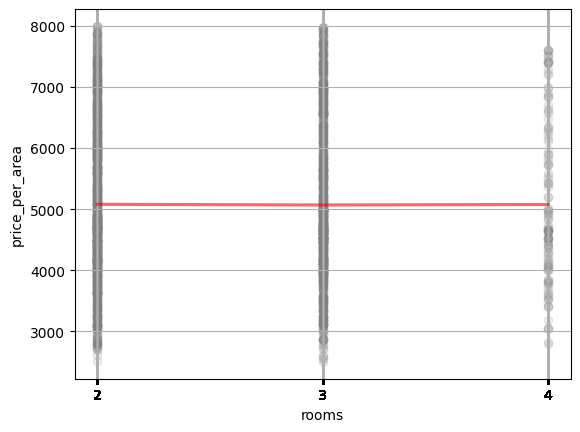

In [14]:
# Create the final scatter plot for room and price_per_area
scatter_room_final = sns.regplot(data=ppa_sliced, 
                           x='rooms', y='price_per_area',                            
                           lowess=True,
                           line_kws={'alpha':0.6,'color': 'red'},
                           scatter_kws={'alpha':0.15,'color': 'grey'}
                           )
scatter_room_final.set(xticks=ppa_sliced.rooms.values)
scatter_room_final.grid()

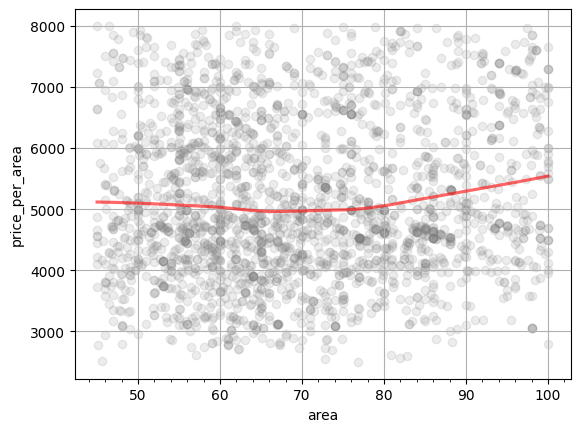

In [15]:
# Create a scatter plot for area and price_per_area
scatter_area_final = sns.regplot(data=ppa_sliced,
                           x='area', y='price_per_area', 
                           lowess=True,
                           line_kws={'alpha':0.6,'color': 'red'},
                           scatter_kws={'alpha':0.15,'color': 'grey'}
                          )
scatter_area_final.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
scatter_area_final.grid()

Based on the last two graphs, I will take the variable pair area - price_per_area for the regression, as the pair rooms - price_per_area doesn't show a visible correlation. 

##### Hypothesis statement
The large the area is, the higher a property's price_per_area will be.

In [16]:
# Reshape the variables into NumPy arrays, 
# with X being the independent variable and y being the dependent variable.
X = ppa_sliced['area'].values.reshape(-1,1)
y = ppa_sliced['price_per_area'].values.reshape(-1,1)

In [17]:
# Split the data into two sets: a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [18]:
# Create a regression object
regression = LinearRegression()

In [19]:
# Fit the model you created to the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Create a prediction for y on the test set
y_predicted = regression.predict(X_test)

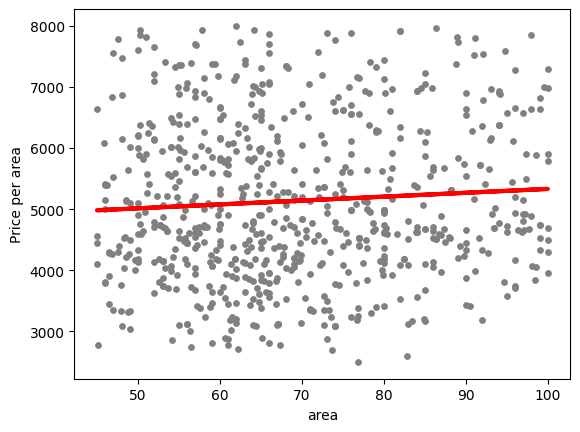

In [21]:
# Create a plot that shows the regression line on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.xlabel('area')
plot_test.ylabel('Price per area')
plot_test.show()

##### My interpretation of how well the line appears to fit the data in a markdown cell: </br>
The previous plot uses lowess regression to describe the trend, linear regression isn't the best suitable model for this use case. Thus, using a linear model to make predictions won't be the best choice, either. Nonetheless, if I use linear instead of lowess regression for the previous plot, it will look like this graph below:


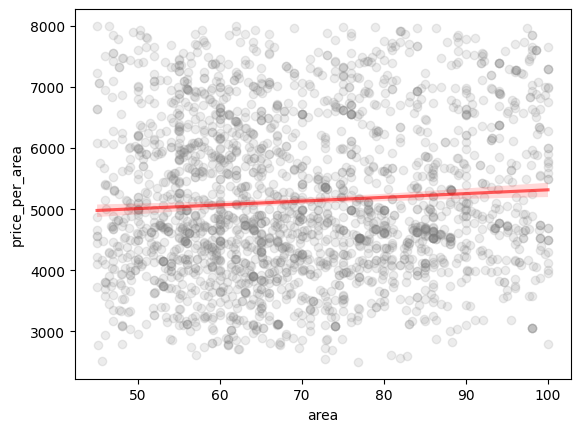

In [35]:
scatter_area_line = sns.regplot(data=ppa_sliced,
                           x='area', y='price_per_area',                            
                           line_kws={'alpha':0.6,'color': 'red'},
                           scatter_kws={'alpha':0.15,'color': 'grey'}
                          )
scatter_area_final.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
scatter_area_final.grid()

Comparing these two plots, their trendline look very similar in its slope and position. The the line appears to fit the data.

In [39]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
# Check the model performance statistics—MSE and R2 score.
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[6.36357839]]
Mean squared error:  1645813.4659577878
R2 score:  0.003296941850860935


The MSE is huge and the R2 score is very close to 0. This indicates that the linear model is a poor fit to the data points here, and should not be used for prediction. Furthermore, the hypothesis "The large the area is, the higher a property's price_per_area will be" can also be ruled out, as the relationship between these two variables is most likely non-linear.

In [42]:
# Compare the predicted y values with the actual y values in a dataframe.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6926.874421,5108.567847
1,4058.139535,5243.348437
2,6818.181818,5326.074956
3,3384.615385,5109.713291
4,6996.889580,5105.258786
5,4772.599663,5149.422020
6,4750.000000,5077.895399
7,3106.925373,5122.440447
8,6150.000000,5077.895399
9,3670.588235,5236.984858


Again, the side-by-side comparison confirms that the linear model cannot be used for predicting accurate results.

##### Thoughts on the model's performance, including reflections on the impact of possible data bias

There are several biases that might have resulted in the poor performance of the model:
1. Because I wanted to only look at listings that fit my criteria, I left out 50% of the original data: from 4973 rows to 2393 rows. The project brief required at least 5000 rows. Hence, the lack of data introduced bias, I should have kept the entire dataset for analysis.
2. There are fraud listings in the dataset, and there's no way to confirm it. Though the frauds are likely a minority, it still introduces inaccuracy for the prediction.
3. The linear model is a poor fit for predicting price_per_area based on area, because different trends can already be visually identified between these two variables within the same scatterplot. 

The impact of the data bias would firstly be inaccurate predictions between price_per_area based on area. Say the model is fit for my criteria, but if someone wants to look at the housing market outside of this criteria, the model could mislead them, as the model is overfitted to a part of the entire dataset.